In [1]:
%load_ext autoreload
%autoreload 2
from paths import *

from matplotlib import pyplot as plt
import torch
from src.SERS_dataset import IterDataset, SERSDataset, SERSDatasetNPY
from src.generate_data2 import pseudoVoigtSimulatorTorch
# import Image

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cuda = torch.cuda.is_available()

c:\Users\andre\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Code\bachelor-project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ps = pseudoVoigtSimulatorTorch(500)
ps.generator

<bound method pseudoVoigtSimulatorTorch.generator of <src.generate_data2.pseudoVoigtSimulatorTorch object at 0x0000021904130C10>>

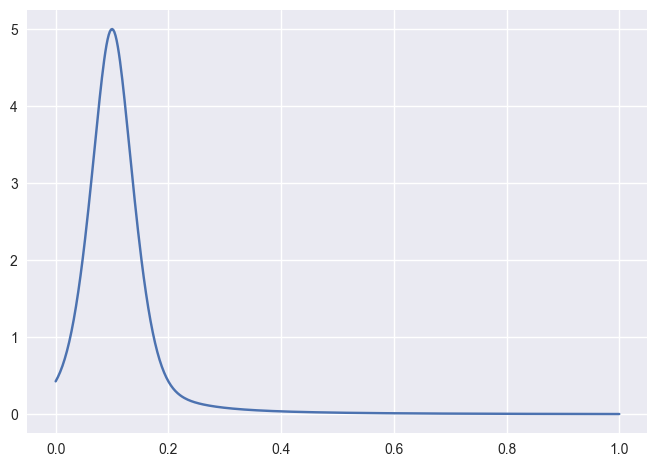

In [78]:
generator = ps.generator(1, peaks = torch.tensor([50]), gamma = torch.tensor([20]), eta = torch.tensor([0.5]), alpha = torch.tensor([5]), sigma = 0)


x, y = next(iter(generator))
W = 500
ws = torch.linspace(0,1,W)
plt.plot(ws, x)
plt.show()

# eta = torch.tensor([0.5, 0.5])
# gamma = torch.tensor([20, 20])
# c = torch.tensor([250, 300])
# alpha = torch.tensor([5,5])

# pv = ps.pseudo_voigt(500, c, gamma, eta, height_normalize=True, wavenumber_normalize=True)
# pv = ps.generate_full_spectrum(c, gamma, eta, alpha=alpha, sigma=0.5, height_normalize=True, wavenumber_normalize=True)
# print(pv.shape)
# # plot pv
# plt.plot(ws, pv)
# print(torch.max(pv[0]))
# plt.plot(ws, pv[1])
# plt.plot(ws, pv[0])
# K = 1 if not c.shape else c.shape[0] 

# wavenumbers = torch.tile(ws, (K, 1))
# cs = torch.tile(c, (W, 1)).T
# gammas = torch.tile(gamma, (W, 1)).T
# etas = torch.tile(eta, (W, 1)).T

# l = ps.lorentzian(wavenumbers, cs, gammas, False, True)
# print(l)

# plt.plot(l[0])
# plt.show()

In [3]:
n_train = 1000
train_test_split = 0.8
n_test = int(n_train/train_test_split * (1 - train_test_split))
wavenumnbers = 500
psv = pseudoVoigtSimulator(500)

print(f"Generation of {n_train} training spectra and {n_test} test spectra. Split is {train_test_split}")

Generation of 1000 training spectra and 249 test spectra. Split is 0.8


## Randomized $\alpha$

$c = 250$, $\gamma = 20$, $\eta=0.5$, $\alpha \in [0.5, 10]$

Generating data with 1 peak, 1000 datapoints, 500 wavenumbers
Parametes: peaks = [250], gamma = [20], eta = [0.5], alpha = [0.5, 10]
Data saved on 2023-04-12 17:00:54 to ./data/randomized_alpha.npy
Data saved on 2023-04-12 17:00:54 to ./data/randomized_alpha_parameters.npy
Data saved on 2023-04-12 17:00:54 to ./data/randomized_alpha_test.npy
Data saved on 2023-04-12 17:00:54 to ./data/randomized_alpha_test_parameters.npy


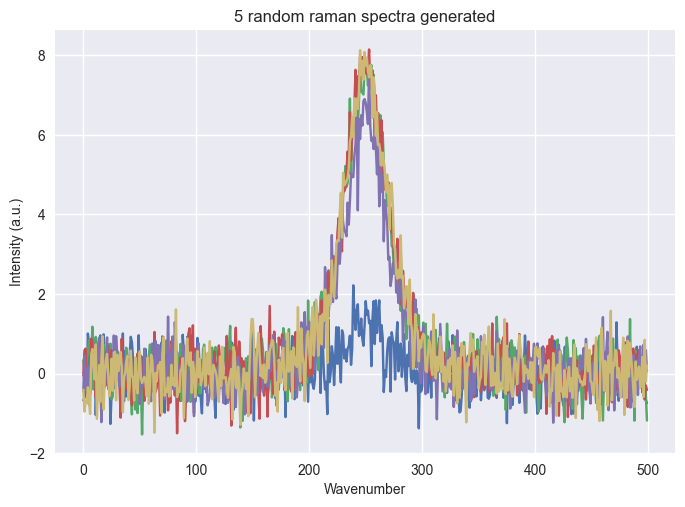

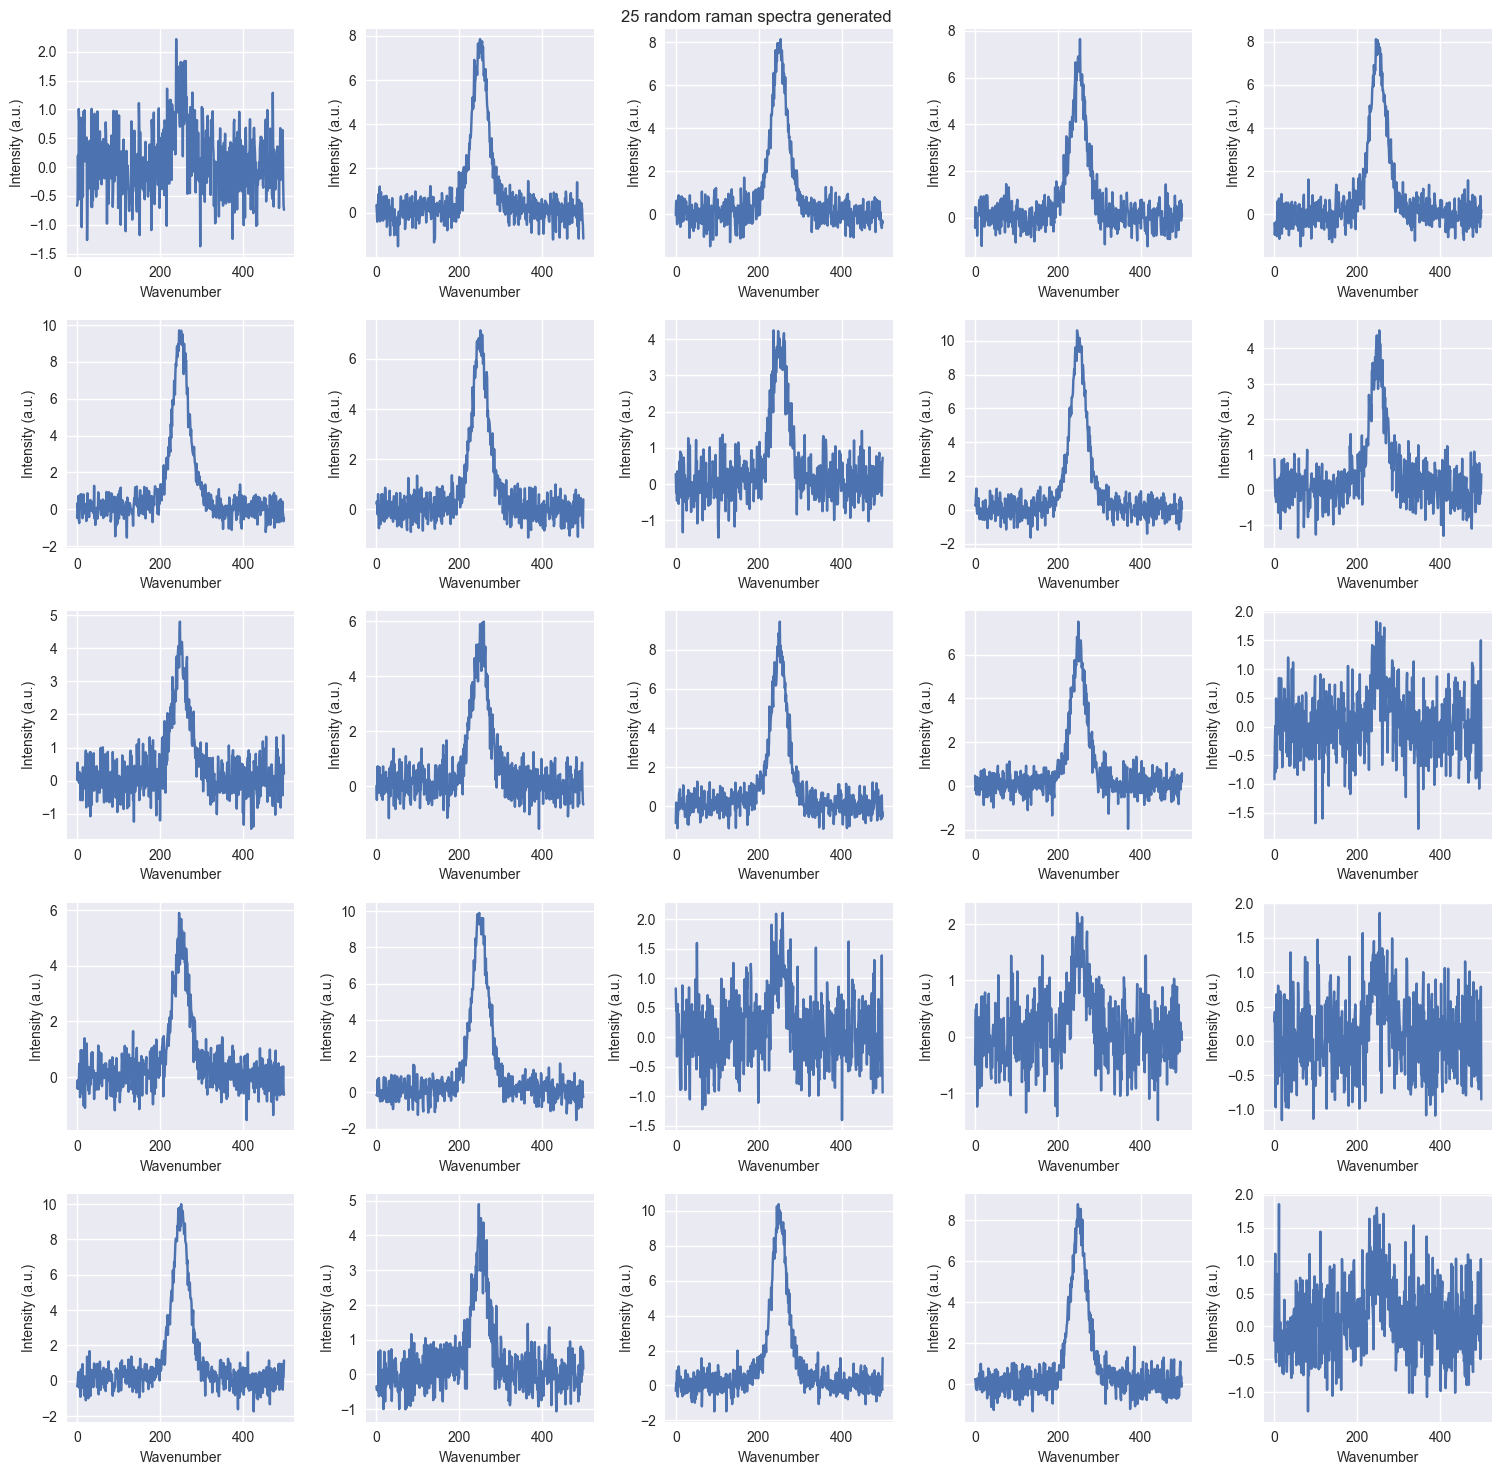

In [34]:
print(f"Generating data with 1 peak, {1000} datapoints, {500} wavenumbers")
print(f"Parametes: peaks = [250], gamma = [20], eta = [0.5], alpha = [0.5, 10]")

for key, amount in {"randomized_alpha": n_train, "randomized_alpha_test": n_test}.items():

    peaks = np.array([250])
    gamma = np.array([20])
    eta = np.array([0.5])
    # Randomize alpha  with shape (amount, len(peaks))
    alpha = np.random.uniform(0.5, 10, (amount, len(peaks)))
    random_spectra = np.zeros((amount, wavenumnbers))
    for i in range(amount):
        ps = psv.generate_full_spectrum(peaks, gamma, eta, alpha[i], sigma=0.5)
        random_spectra[i] = ps

    c = np.tile(peaks, (amount, 1))
    gammas = np.tile(gamma, (amount, 1))
    etas = np.tile(eta, (amount, 1))

    # Merge all parameters into one array
    parameters = [c, gammas, etas, alpha]
    parameters = np.array(parameters)
    # save to file
    save_to_file(key, random_spectra)
    save_to_file(f'{key}_parameters', parameters)

plot_spectra(random_spectra, 5)

plot_spectra_in_grid(random_spectra, (5,5)) 

## Randomized $c$

$c \in [50, 450]$, $\gamma = 20$, $\eta=0.5$, $\alpha = 1$

Generating data with 1 peak, 1000 datapoints, 500 wavenumbers
Parametes: peaks = [50, 450], gamma = [20], eta = [0.5], alpha = [1]
Data saved on 2023-04-12 17:42:11 to ./data/randomized_c.npy
Data saved on 2023-04-12 17:42:11 to ./data/randomized_c_parameters.npy
Data saved on 2023-04-12 17:42:11 to ./data/randomized_c_test.npy
Data saved on 2023-04-12 17:42:11 to ./data/randomized_c_test_parameters.npy


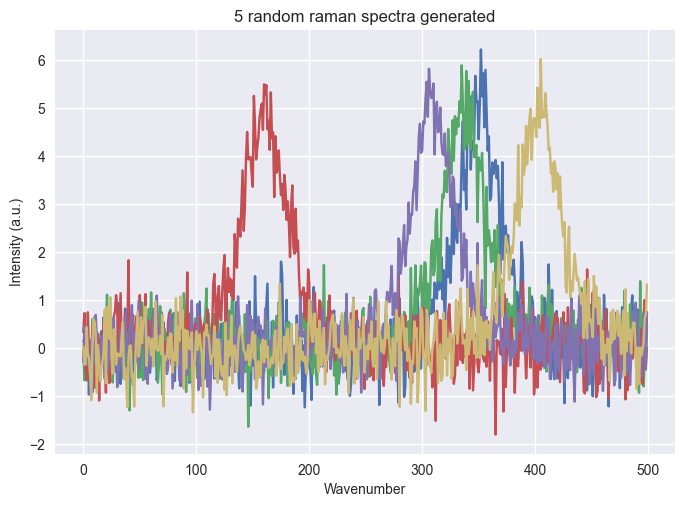

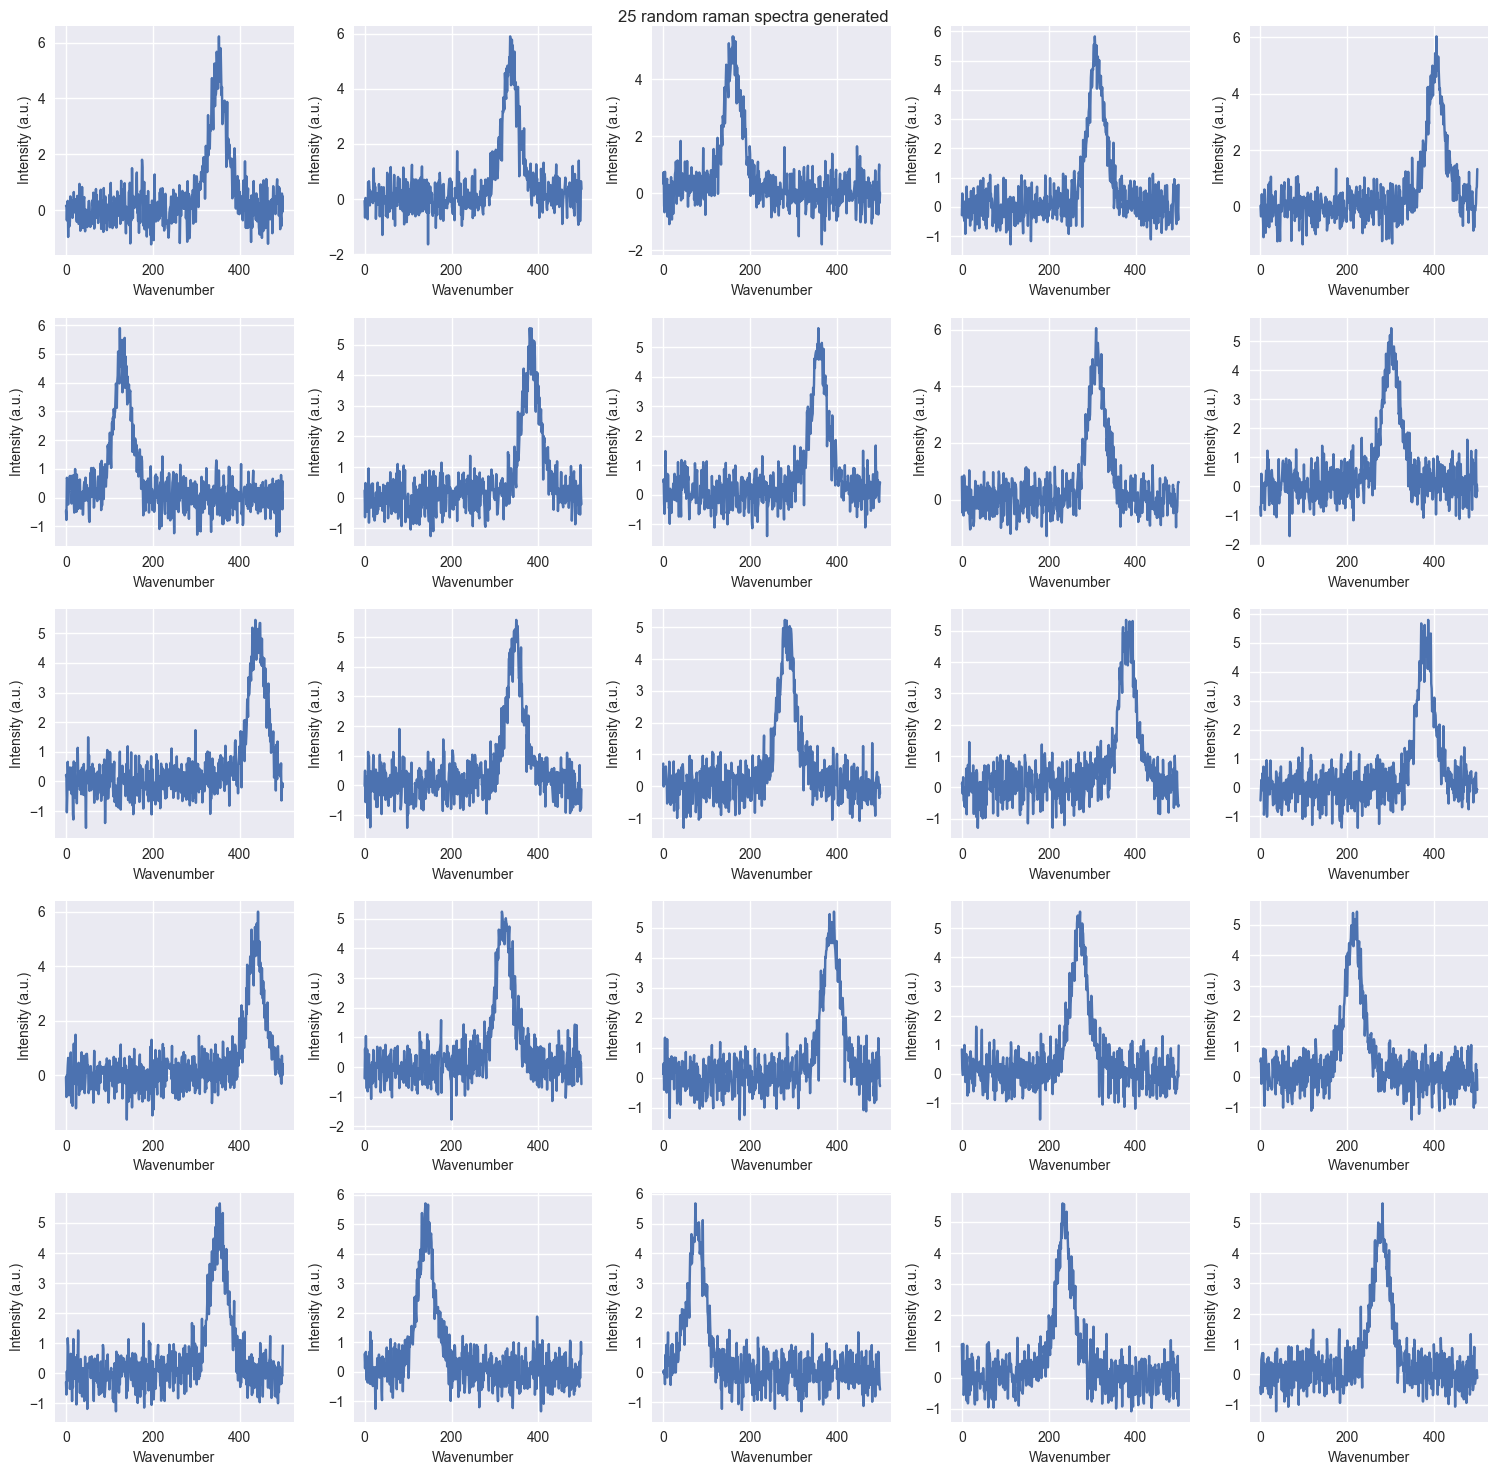

In [37]:
print(f"Generating data with 1 peak, {1000} datapoints, {500} wavenumbers")
print(f"Parametes: peaks = [50, 450], gamma = [20], eta = [0.5], alpha = [1]")

for key, amount in {"randomized_c": n_train, "randomized_c_test": n_test}.items():

    # peaks = np.array([250])
    gamma = np.array([20])
    eta = np.array([0.5])
    alpha = np.array([5])
    # Randomize alpha  with shape (amount, len(peaks))
    peaks = np.random.uniform(50, 450, (amount, len(alpha)))
    random_spectra = np.zeros((amount, wavenumnbers))
    for i in range(amount):
        ps = psv.generate_full_spectrum(peaks[i], gamma, eta, alpha)
        random_spectra[i] = ps

    gammas = np.tile(gamma, (amount, 1))
    etas = np.tile(eta, (amount, 1))
    alphas = np.tile(alpha, (amount, 1))

    # Merge all parameters into one array
    parameters = [peaks, gammas, etas, alphas]
    parameters = np.array(parameters)
    # save to file
    save_to_file(key, random_spectra)
    save_to_file(f'{key}_parameters', parameters)

plot_spectra(random_spectra, 5)

plot_spectra_in_grid(random_spectra, (5,5)) 